# Breast Cancer Detection
## Classifications 

Dataset: Breast Cancer Wisconsin dataset <br><br>
Goal: Classify tumors as benign or malignant based on cell features. <br><br>
Techniques: Implement LDA, QDA, KNN, and compare their performance. <br><br>
Impact: High societal impact, potentially saving lives and improving healthcare outcomes. :) <br><br>
Skills Gained: Medical data handling, classification, sensitivity to false negatives (important in medical diagnostics) <br><br>

Link : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data <br><br>
CSV also uploaded 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ISLP import confusion_table 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA) 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Importing the dataset
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.shape

(569, 33)

In [8]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
df = df.drop(columns=['Unnamed: 32'])

No null of na values present in the dataset

## Exploratory Data Analysis
Analyzing the datset to find any patterns and relations <br>
<b>Benign tumors are <i>noncancerous</i>. Malignant tumors are <i>cancerous</i></b> <br>
B - Good, M - Bad 

<Axes: xlabel='diagnosis', ylabel='Count'>

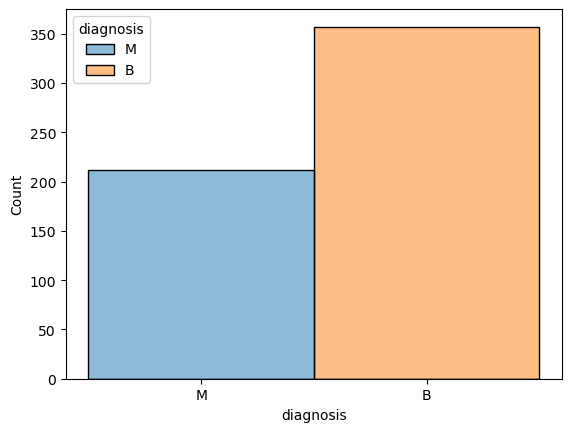

In [18]:
sns.histplot(data=df, x='diagnosis', hue='diagnosis')

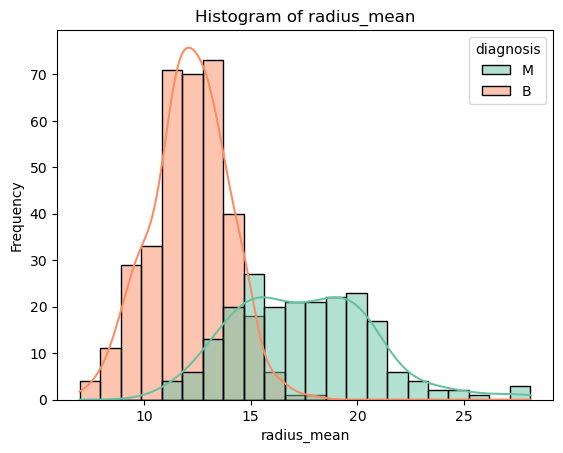

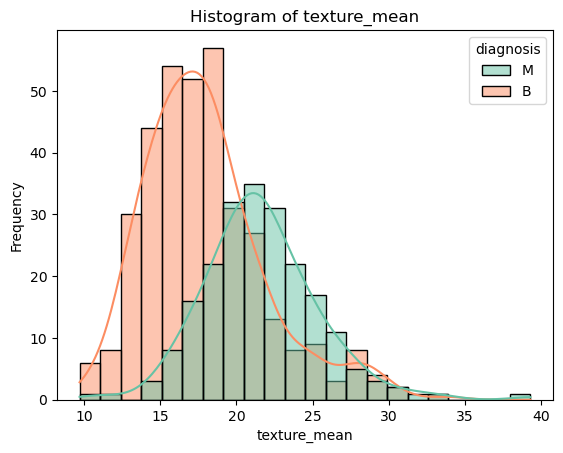

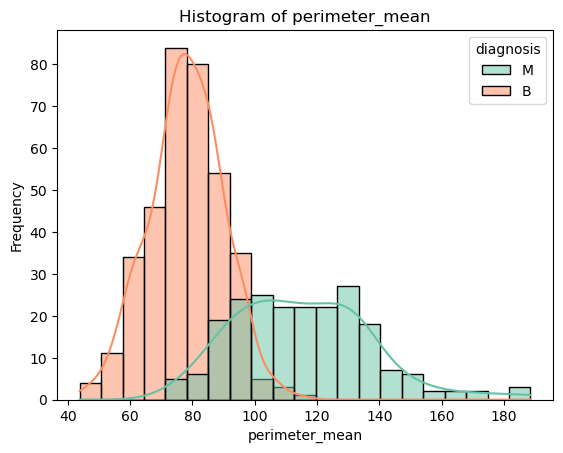

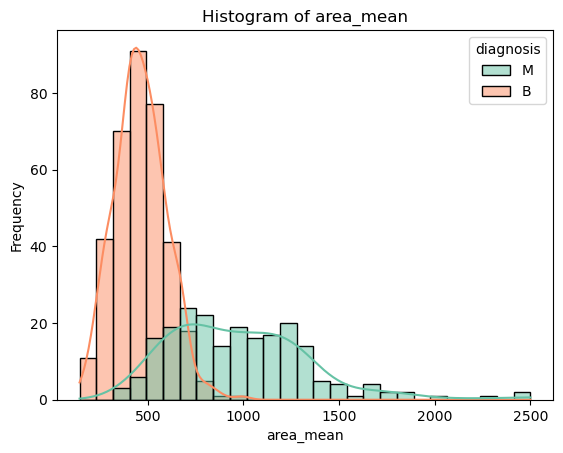

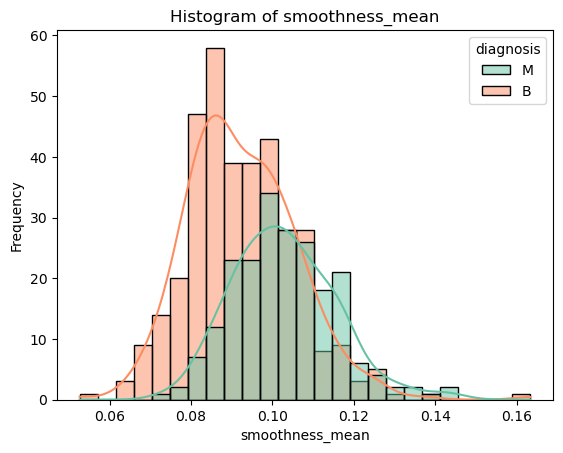

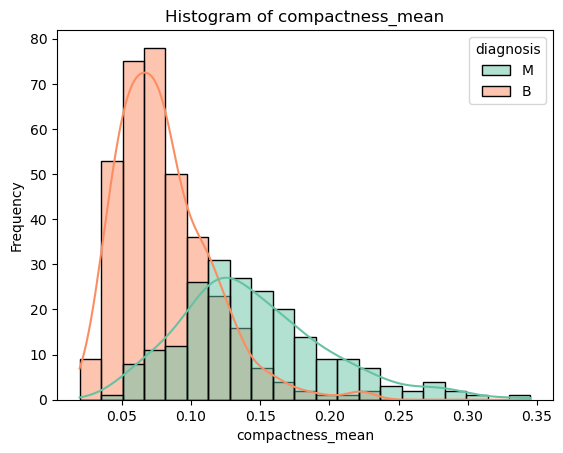

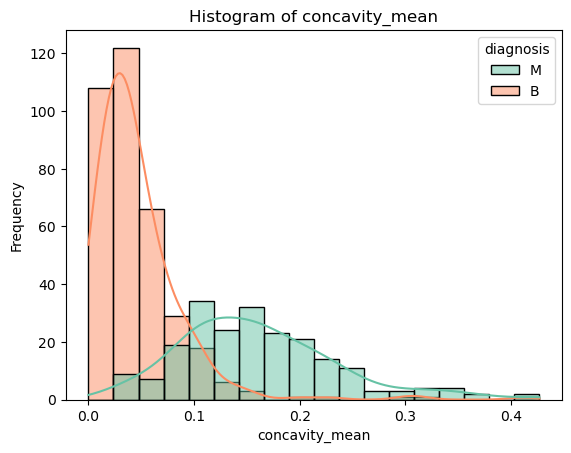

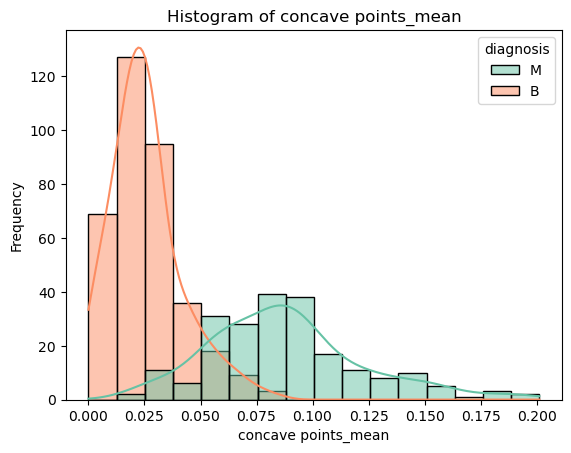

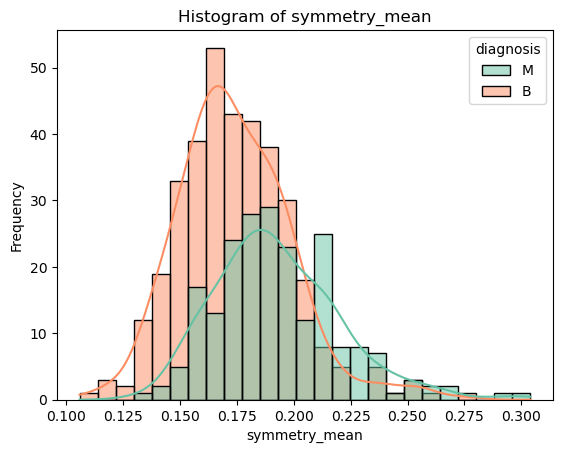

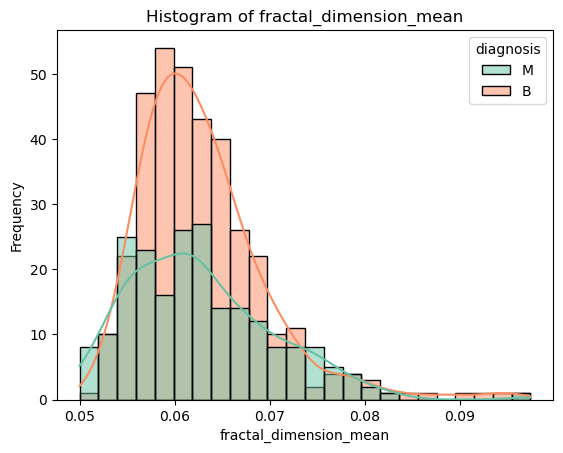

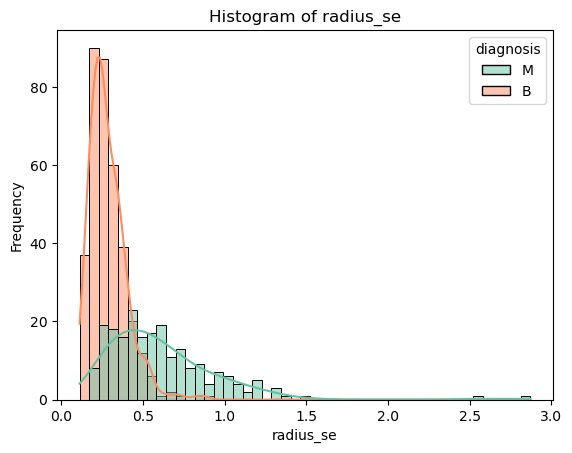

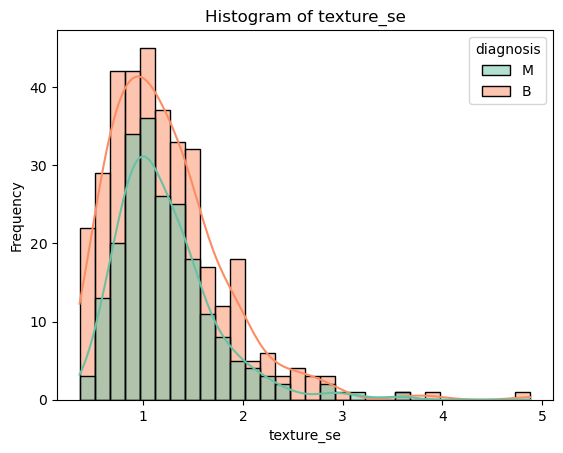

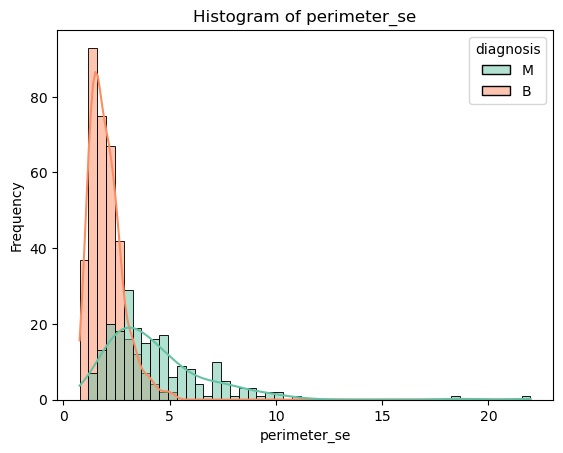

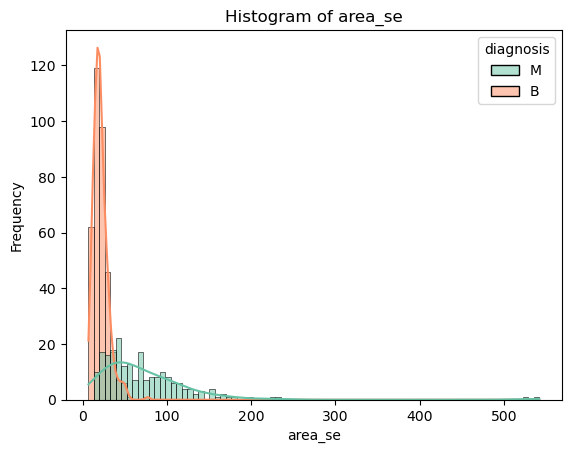

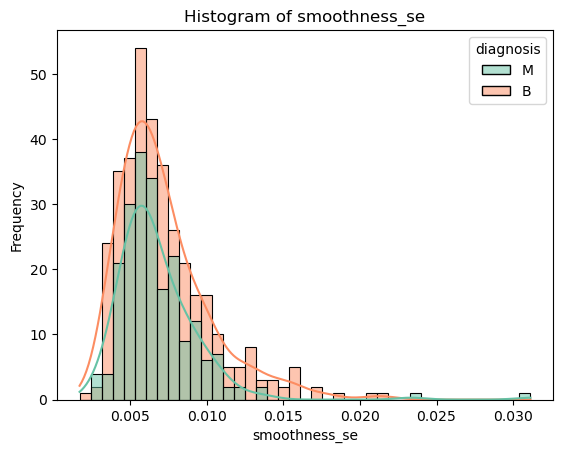

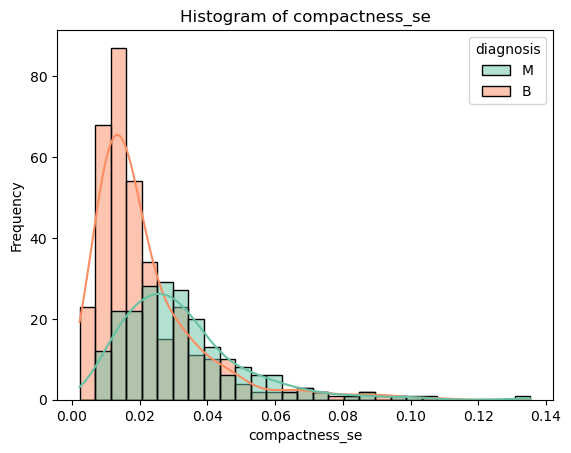

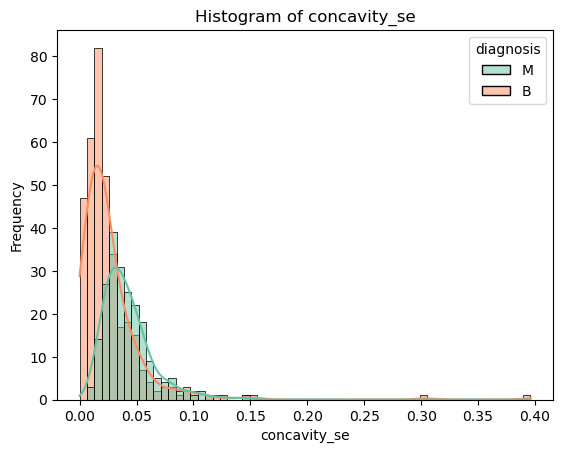

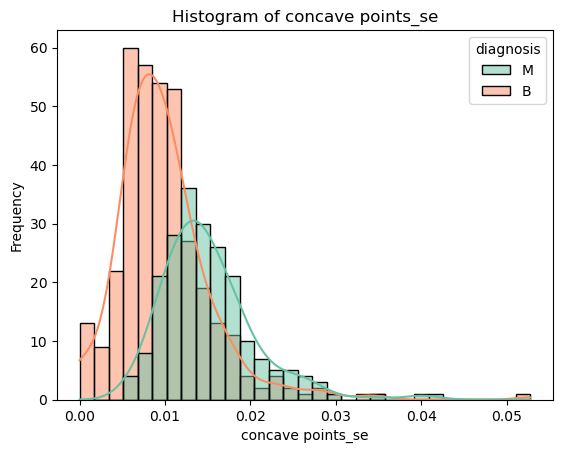

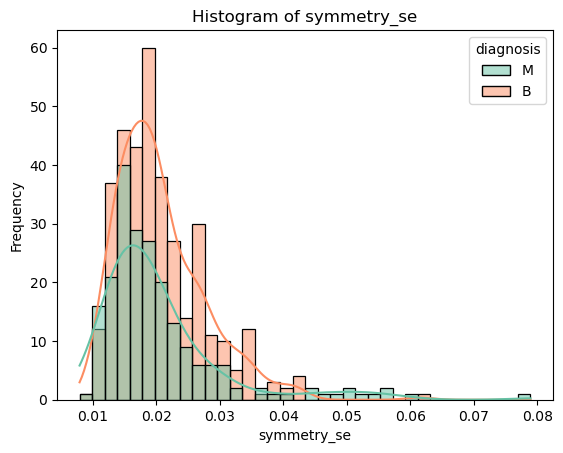

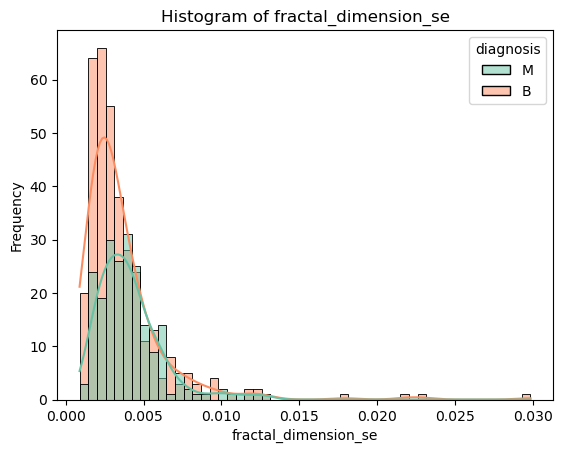

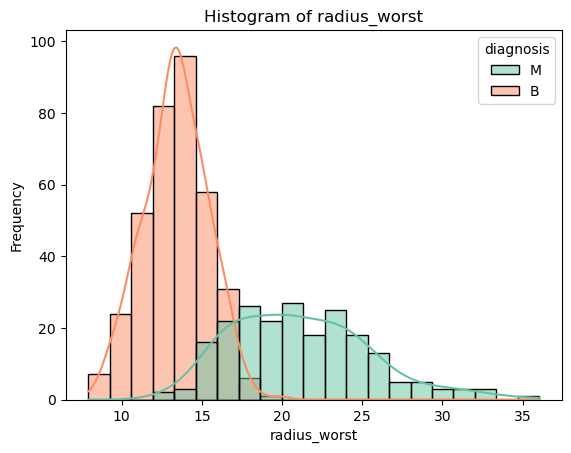

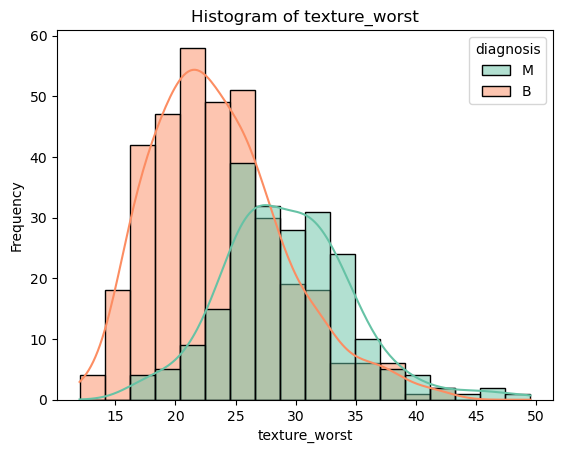

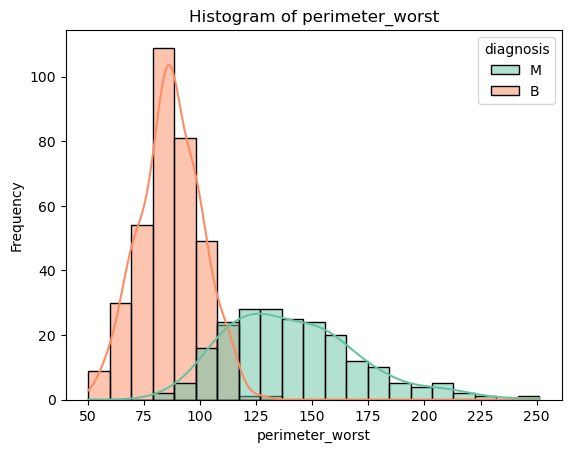

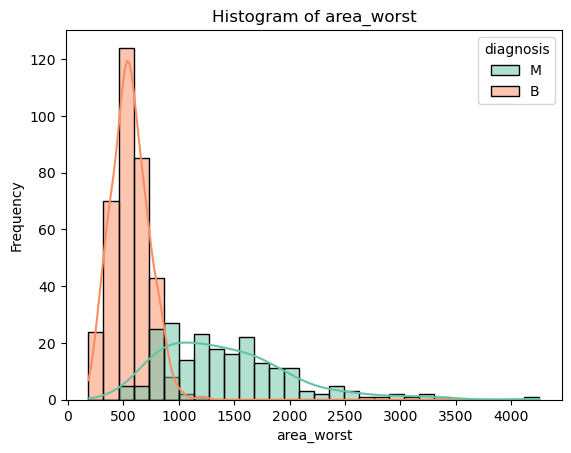

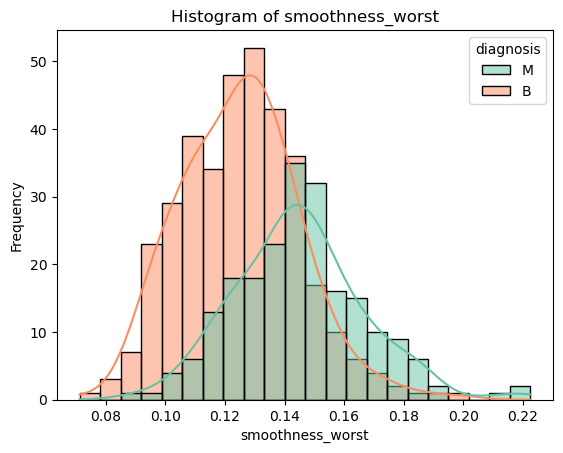

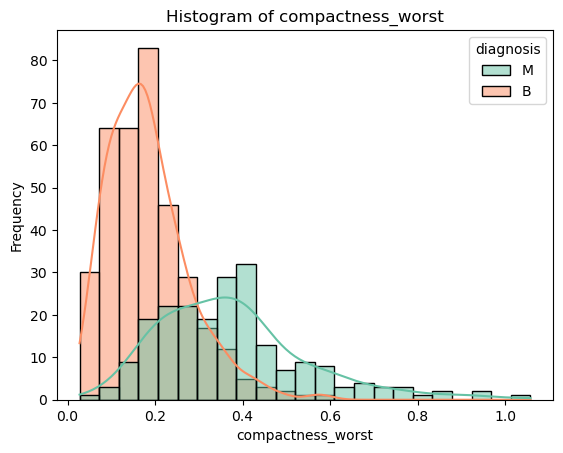

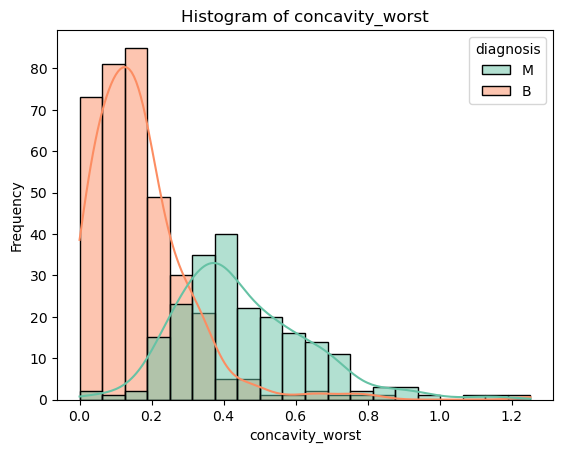

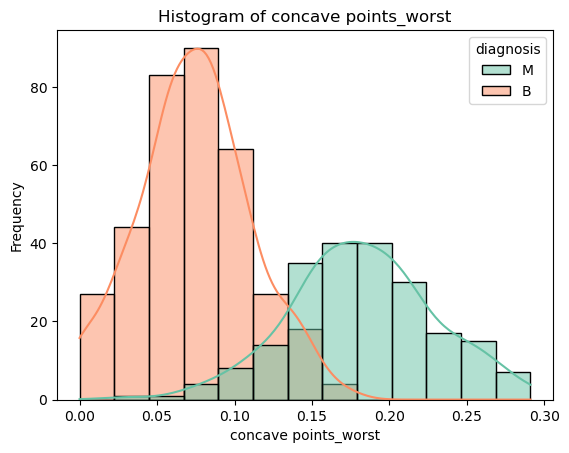

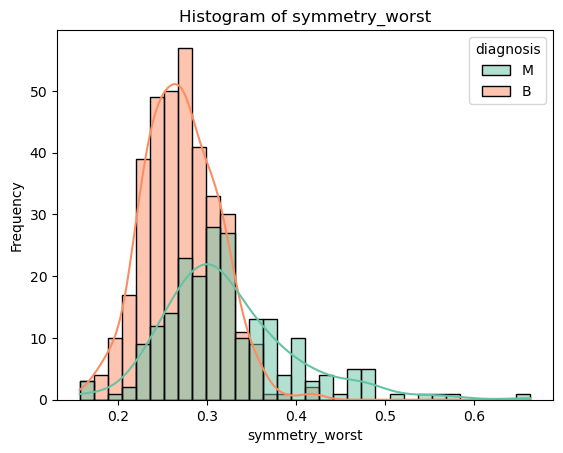

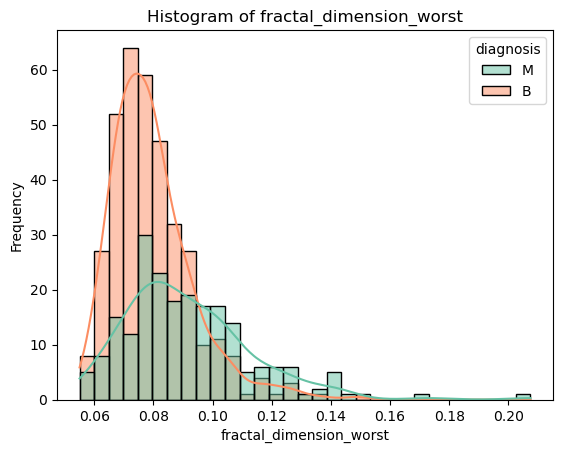

In [26]:
# Plotting the data of find any patterns
for column in df.columns.drop(['id', 'diagnosis']):
    sns.histplot(data=df, x=column, kde=True, hue='diagnosis', palette='Set2')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [27]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [28]:
212/(357+212)

0.37258347978910367

At first glance most of the distributons happens to be Right skewed(Positive). $ 37 $% is considered cancerous in the dataset. Some not most of the the distributions are overlapping. Perimeter, Radius, Area and Concavity has the highest impact. 

## Data Preprocessing
Transforming the dataset to be more suitable for training

In [29]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
# Creating a Feature only dataframe
df_features = df.drop(columns=['id', 'diagnosis'])
df_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
# Scaling the dataset into a dataset with the standard deviation of a unit
# Distance based models like K-Nearest Neighbours will benefit  
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
df_features_scaled = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)

In [38]:
df_features_scaled.std()

radius_mean                1.00088
texture_mean               1.00088
perimeter_mean             1.00088
area_mean                  1.00088
smoothness_mean            1.00088
compactness_mean           1.00088
concavity_mean             1.00088
concave points_mean        1.00088
symmetry_mean              1.00088
fractal_dimension_mean     1.00088
radius_se                  1.00088
texture_se                 1.00088
perimeter_se               1.00088
area_se                    1.00088
smoothness_se              1.00088
compactness_se             1.00088
concavity_se               1.00088
concave points_se          1.00088
symmetry_se                1.00088
fractal_dimension_se       1.00088
radius_worst               1.00088
texture_worst              1.00088
perimeter_worst            1.00088
area_worst                 1.00088
smoothness_worst           1.00088
compactness_worst          1.00088
concavity_worst            1.00088
concave points_worst       1.00088
symmetry_worst      

In [39]:
# Setting the response column
# can be done with the lableencoder but i'm custom mapping
response_map = {
    "M":1,
    "B":0
}
y = df['diagnosis'].map(response_map)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, y, test_size=0.2) # 80% split

In [50]:
def report(i):
    print(accuracy_score(i, y_test))
    print(classification_report(i, y_test))
    print(confusion_matrix(i, y_test))

## Predictions
Using different Classications models to determine the best for the use case

### Logistic Regression

In [51]:
lr_model = LogisticRegression()
lr_pred = lr_model.fit(X_train, y_train).predict(X_test)
report(lr_pred)

0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

[[74  0]
 [ 3 37]]


### Linear Discriminant Analysis

In [53]:
lda_model = LDA()
lda_pred = lda_model.fit(X_train, y_train).predict(X_test)
report(lda_pred)

0.9649122807017544
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        79
           1       0.92      0.97      0.94        35

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

[[76  3]
 [ 1 34]]


### Quadretic Discriminant Analysis

In [54]:
qda_model = QDA()
qda_pred = qda_model.fit(X_train, y_train).predict(X_test)
report(qda_pred)

0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.97      0.92      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

[[74  1]
 [ 3 36]]


### K-Nearest Neigbours 
Hyperparameter Tuning

In [58]:
for n in range(1, 101):
    knn_model = KNeighborsClassifier(n_neighbors=n, n_jobs=-1) # n_jobs 1 for multicore processing on scikit-learn
    knn_pred = knn_model.fit(X_train, y_train).predict(X_test)
    print(f'Neighbours: {n}  Accuracy; {accuracy_score(y_pred=knn_pred, y_true=y_test)}  FN: {confusion_matrix(y_pred=knn_pred, y_true=y_test)[1][0]}')

Neighbours: 1  Accuracy; 0.956140350877193  FN: 1
Neighbours: 2  Accuracy; 0.9824561403508771  FN: 2
Neighbours: 3  Accuracy; 0.9736842105263158  FN: 1
Neighbours: 4  Accuracy; 0.9736842105263158  FN: 2
Neighbours: 5  Accuracy; 0.9736842105263158  FN: 2
Neighbours: 6  Accuracy; 0.9736842105263158  FN: 2
Neighbours: 7  Accuracy; 0.9736842105263158  FN: 2
Neighbours: 8  Accuracy; 0.9736842105263158  FN: 2
Neighbours: 9  Accuracy; 0.9736842105263158  FN: 2
Neighbours: 10  Accuracy; 0.9736842105263158  FN: 2
Neighbours: 11  Accuracy; 0.9736842105263158  FN: 2
Neighbours: 12  Accuracy; 0.9824561403508771  FN: 2
Neighbours: 13  Accuracy; 0.956140350877193  FN: 2
Neighbours: 14  Accuracy; 0.9824561403508771  FN: 2
Neighbours: 15  Accuracy; 0.9649122807017544  FN: 2
Neighbours: 16  Accuracy; 0.9736842105263158  FN: 2
Neighbours: 17  Accuracy; 0.9736842105263158  FN: 2
Neighbours: 18  Accuracy; 0.9824561403508771  FN: 2
Neighbours: 19  Accuracy; 0.9824561403508771  FN: 2
Neighbours: 20  Accurac